### Selecting the input image and file paths for the film dataset
The input image is the image that will be matched to film posters in the dataset

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os
import csv
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os

In [2]:
# most of this code has been created by prompting ChatGPT and then editing and restructuring it for the needs of the project

In [3]:
# Input image file path - Select the input image
image_path = "input_images/2835EDC5-660A-4007-9508-225B33EB2021_1_102_o.jpeg"

# Choose the language for film recommendations - 'french', 'english', or 'hindi'
language = "english"

# Select the number of film recommendations
number = 5

### Extracting the colour palette of the input image

In [4]:
# code inspired by into-to-ds week 8 notebook
# used that code to guide ChatGPT to give me similar code for colour palette extraction

# function to extract the colour palette of an image
def get_colour_palette(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = image.reshape((image.shape[1]*image.shape[0],3))

    kmeans = KMeans(n_clusters=3).fit(image)
    centroid = kmeans.cluster_centers_

    return centroid

# loading the input image
input_image = cv2.imread(image_path)

# extracting the colour palette of the input image
input_palette = get_colour_palette(input_image)

# saving the colour palette to a file
np.save('input_palette.npy', input_palette)


### Matching the input image to the film posters based on their colour palettes

The closest matches are selected as film recommendations.

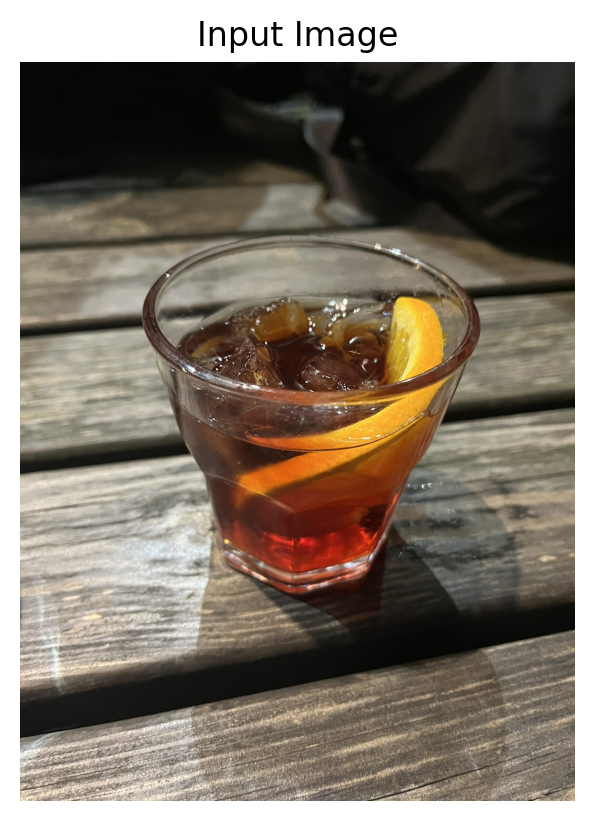

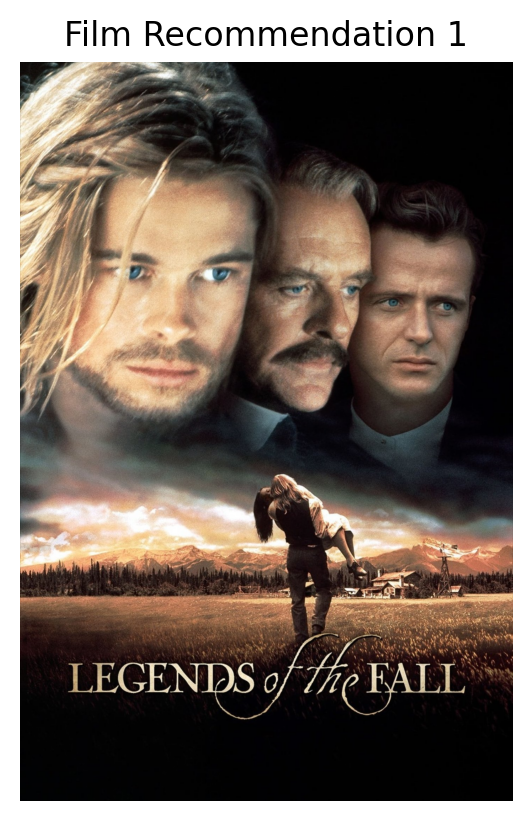

title: Legends of the Fall
original_title: Legends of the Fall
release_date: 1994-12-16
rating: 7.4
overview: An epic tale of three brothers and their father living in the remote wilderness of 1900s USA and how their lives are affected by nature, history, war, and love.


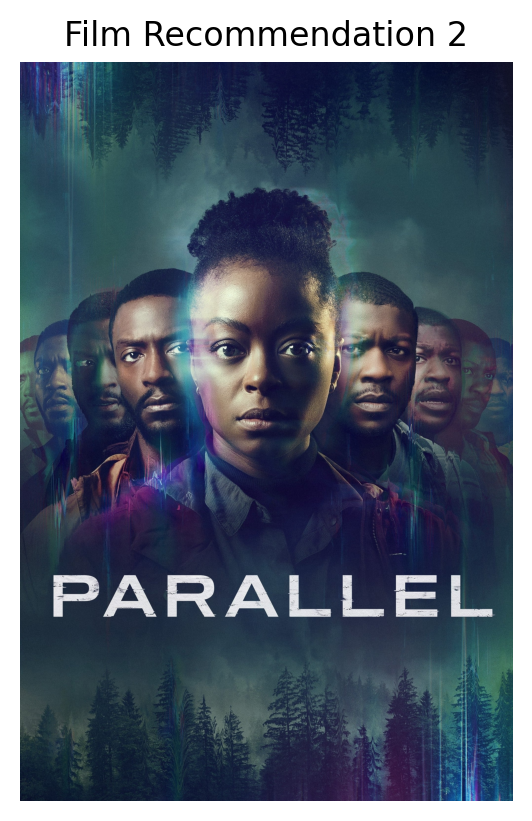

title: Parallel
original_title: Parallel
release_date: 2024-02-23
rating: 5.55
overview: Grief-stricken after the loss of her child, Vanessa takes refuge at a lake house only to be met with an aberration of herself from a parallel universe and realizes the multiverse gates hold the key to releasing her grief or trapping her forever.


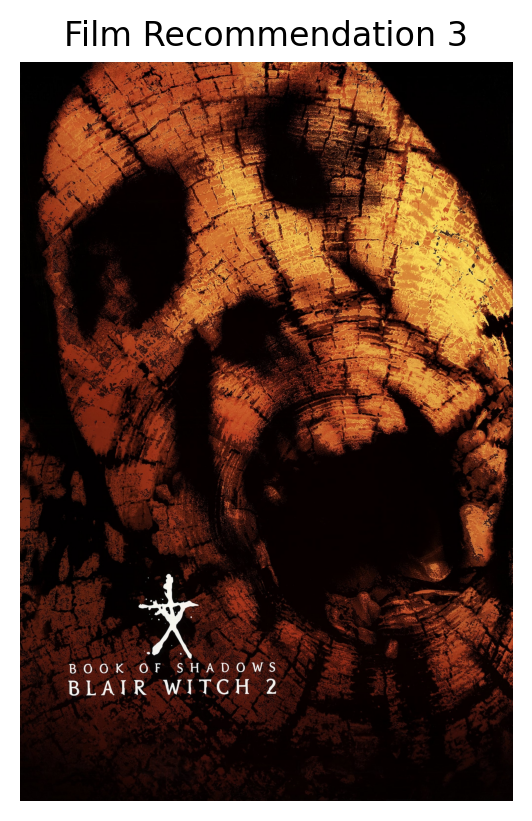

title: Book of Shadows: Blair Witch 2
original_title: Book of Shadows: Blair Witch 2
release_date: 2000-10-27
rating: 4.259
overview: Young adults become fascinated by the events of the three missing filmmakers in Maryland, so they decide to go into the same woods and find out what really happened.


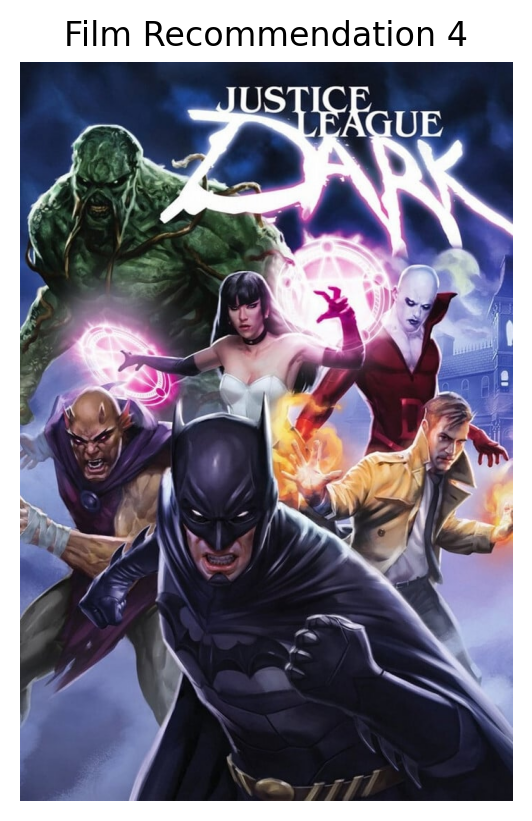

title: Justice League Dark
original_title: Justice League Dark
release_date: 2017-01-24
rating: 7.29
overview: When innocent civilians begin committing unthinkable crimes across Metropolis, Gotham City and beyond, Batman must call upon mystical counterparts to eradicate this demonic threat to the planet; enter Justice League Dark. This team of Dark Arts specialists must unravel the mystery of Earth's supernatural plague and contend with the rising, powerful villainous forces behind the siege—before it's too late for all of mankind.


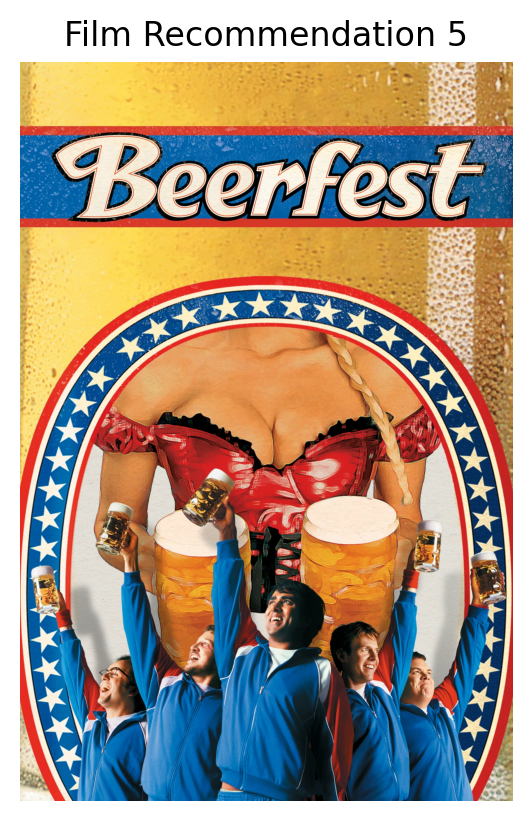

title: Beerfest
original_title: Beerfest
release_date: 2006-08-25
rating: 5.879
overview: During a trip to Germany to scatter their grandfather's ashes, German-American brothers Todd and Jan discover Beerfest, the secret Olympics of downing stout, and want to enter the contest to defend their family's beer-guzzling honor. Their Old Country cousins sneer at the Yanks' chances, prompting the siblings to return to America to prepare for a showdown the following year.


In [5]:
# setting a high resolution display
%config InlineBackend.figure_format = 'retina'

def set_language_paths(language):
    folder_path = ""
    csv_file_path = ""
    palette = ""
    
    language_lower = language.lower()
    if language_lower == "french":
        folder_path = "movie_posters_french_10k"
        csv_file_path = "movie_data_french_10k.csv"
        palette = "poster_palettes.npy"
    elif language_lower == "english":
        folder_path = "movie_posters_10k"
        csv_file_path = "movie_data_10k.csv"
        palette = "poster_palettes_french.npy"
    elif language_lower == "hindi":
        folder_path = "movie_posters_hindi_7k"
        csv_file_path = "movie_data_hindi_7k.csv"
        palette = "poster_palettes_hindi.npy"
    else:
        print("Invalid language input. Defaulting to English.")
        folder_path = "movie_posters_10k"
        csv_file_path = "movie_data_10k.csv"
        palette = "poster_palettes.npy"  # Default to English encoded features
    
    return folder_path, csv_file_path, palette

# calling the function to set language paths
folder_path, csv_file_path, palette = set_language_paths(language)

# getting the list of image files in the specified folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# loading the colour palette of the input image
input_palette = np.load('input_palette.npy')

# loading the colour palettes of the film posters
folder_path, csv_file_path, palette = set_language_paths(language)
poster_palettes = np.load(palette, allow_pickle=True)

def find_nearest_images(target_palette, poster_palettes, top_n=3):
    similarities = cosine_similarity(target_palette.reshape(1, -1), poster_palettes.reshape(len(poster_palettes), -1))
    nearest_image_indices = np.argsort(similarities, axis=None)[-top_n:][::-1]
    return nearest_image_indices

# finding the nearest images based on color palette matching
nearest_image_indices = find_nearest_images(input_palette, poster_palettes, top_n=number)

# displaying the input image
input_image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')
plt.show()

# displaying the closest matches
for idx, nearest_image_index in enumerate(nearest_image_indices, start=1):
    nearest_image_path = image_files[nearest_image_index]
    nearest_image = cv2.imread(nearest_image_path)
    plt.imshow(cv2.cvtColor(nearest_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Film Recommendation {idx}')
    plt.axis('off')
    plt.show()

    # extracting the image filename without extension
    matched_image_name = os.path.splitext(os.path.basename(nearest_image_path))[0]

    # converting the image filename to an integer
    matched_image_id = int(matched_image_name)

    # matching the filename (film id) to the film details in the CSV file
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        reader = csv.DictReader(csv_file)
        headers = reader.fieldnames
        if 'id' not in headers:
            print("Error: 'id' column not found in the CSV file.")
        else:
            for row in reader:
                if int(row['id']) == matched_image_id:

                    # printing film details 
                    print(f"title: {row['title']}")
                    print(f"original_title: {row['original_title']}")
                    print(f"release_date: {row['release_date']}")
                    print(f"rating: {row['vote_average']}")
                    print(f"overview: {row['overview']}")
                    break